In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

In [2]:
# Import Gold data in panda and passed to a variable name "df1"
df1 = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)
df1= df1.rename(columns={'Open': 'Gold'})
df1.head()

,Gold,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300


In [3]:
# Import Silver data in panda and passed to a variable name "df2"
df2 = pd.read_csv("Silver.csv", parse_dates = True, index_col=0)
df2= df2.rename(columns={'Price': 'Silver'})
df2.head()

,Silver,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,5.335,5.290,5.290,5.290,0.00K,-1.44%
2000-01-05,5.170,5.170,5.170,5.170,-,-3.09%
2000-01-06,5.127,5.127,5.127,5.127,-,-0.83%
2000-01-07,5.150,5.150,5.150,5.150,0.05K,0.45%
2000-01-10,5.145,5.145,5.145,5.145,0.06K,-0.10%


In [4]:
# Import USD data in panda and passed to a variable name "df3"
df3 = pd.read_csv("USD_Index.csv", parse_dates = True, index_col=0)
df3 = df3.rename(columns={'Price': 'USD'})
df3.head()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-03,99.89,101.39,101.57,99.85,2.62K,-1.62%
2000-01-04,100.10,100.18,100.37,99.70,1.00K,0.21%
2000-01-05,100.05,100.09,100.16,99.40,0.89K,-0.05%
2000-01-06,100.34,100.05,100.48,99.60,1.55K,0.29%
2000-01-07,100.50,100.18,100.70,100.16,2.85K,0.16%


In [5]:
# Import Oil data in panda and passed to a variable name "df4"
df4 = pd.read_csv("Crude_Oil.csv", parse_dates = True, index_col=0)
df4 = df4.rename(columns={'Price': 'Oil'})
df4.head()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%
2000-01-10,24.67,24.22,24.75,24.02,68.90K,1.86%


In [6]:
# Import Interest data in panda and passed to a variable name "df5"
df5 = pd.read_csv("Interest_Rate.csv", parse_dates = True, index_col=0)
df5 = df5.rename(columns={'Open': 'Interest'})
df5.head()

,Interest,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6.377,6.440,6.377,6.435,6.435,0.0
2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0


In [7]:
# Import Stock data in panda and passed to a variable name "df6"
df6 = pd.read_csv("Stock_Index.csv", parse_dates = True, index_col=0)
df6 = df6.rename(columns={'Open': 'Stock'})
df6.head()

,Stock,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6876.100098,6876.100098,6876.100098,6876.100098,6876.100098,0
2000-01-03,6762.109863,6762.109863,6762.109863,6762.109863,6762.109863,0
2000-01-04,6543.759766,6543.759766,6543.759766,6543.759766,6543.759766,0
2000-01-05,6567.029785,6567.029785,6567.029785,6567.029785,6567.029785,0
2000-01-06,6635.439941,6635.439941,6635.439941,6635.439941,6635.439941,0


In [8]:
dataset = pd.concat([df1.Gold, df2.Silver, df3.USD, df4.Oil, df5.Interest, df6.Stock], axis=1)
dataset.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
1999-12-31,17.9375,NaN,NaN,NaN,6.377,6876.100098
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941


In [9]:
dataset.isnull().sum()

Gold        535
Silver      418
USD         443
Oil         478
Interest    539
Stock       535
dtype: int64

In [10]:
df = dataset.loc['2000-01-01' : ]
df.tail()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2019-05-27,NaN,NaN,97.477,59.16,NaN,NaN
2019-05-28,11.70,NaN,97.842,59.14,2.299,12597.70996
2019-05-29,11.73,NaN,98.035,58.81,2.231,12398.24023
2019-05-30,11.76,NaN,98.053,56.59,2.261,12402.54004
2019-05-31,NaN,NaN,97.877,55.09,NaN,NaN


In [11]:
df.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941
2000-01-07,17.8125,5.150,100.50,24.22,6.545,6792.669922


In [12]:
df.Silver.median()

15.626999999999999

In [13]:
df.Oil.median()

59.36

In [14]:
df.Gold.median()

19.950001

In [15]:
df.Stock.median()

8105.0549315

In [16]:
df.Interest.median()

3.4284999999999997

In [17]:
df.USD.median()

88.22

In [18]:
a=df.Silver.fillna(15.61)

In [19]:
b = df.Interest.fillna(3.42)

In [20]:
c = df.USD.fillna(88.22)

In [21]:
d = df.Stock.fillna(8105)

In [22]:
e = df.Oil.fillna(59.36)

In [23]:
f = df.Gold.fillna(19.95)

In [24]:
DF = pd.concat([a, b, c, d, e, f], axis=1)
DF.head()

,Silver,Interest,USD,Stock,Oil,Gold
Date,,,,,,
2000-01-03,15.610,6.498,99.89,6762.109863,59.36,17.5625
2000-01-04,5.335,6.530,100.10,6543.759766,25.55,17.3125
2000-01-05,5.170,6.521,100.05,6567.029785,24.91,17.5625
2000-01-06,5.127,6.558,100.34,6635.439941,24.78,17.7500
2000-01-07,5.150,6.545,100.50,6792.669922,24.22,17.8125


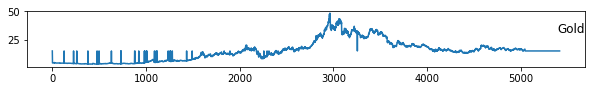

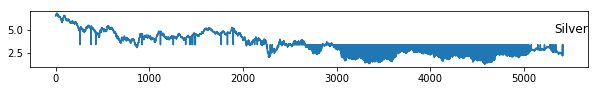

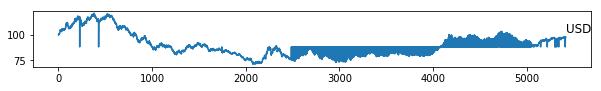

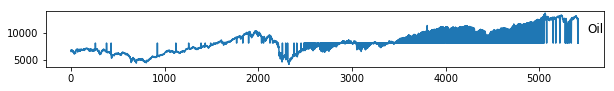

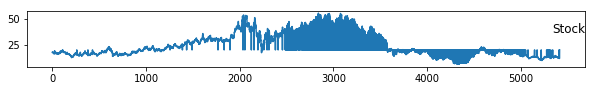

In [27]:
from matplotlib import pyplot
import seaborn as sb
values = DF.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
    pyplot.show()

In [28]:
DF.describe()

,Silver,Interest,USD,Stock,Oil,Gold
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,15.601588,3.464331,90.254068,8425.344426,61.841789,24.439560
std,8.758498,1.160704,11.236242,2090.257386,25.305381,11.471899
min,4.026000,1.336000,71.304000,4226.310059,17.450000,6.080000
25%,7.349000,2.485000,81.321000,6842.580078,43.300000,16.260000
50%,15.610000,3.420000,88.220000,8105.000000,59.360000,19.950000
75%,18.843000,4.301000,96.350000,10029.139650,80.210000,31.430000
max,48.584000,6.781000,121.210000,13592.799810,145.290000,55.540001


In [29]:
DF.var()

Silver      7.671129e+01
Interest    1.347233e+00
USD         1.262531e+02
Stock       4.369176e+06
Oil         6.403623e+02
Gold        1.316045e+02
dtype: float64

In [30]:
DF.shape

(5417, 6)

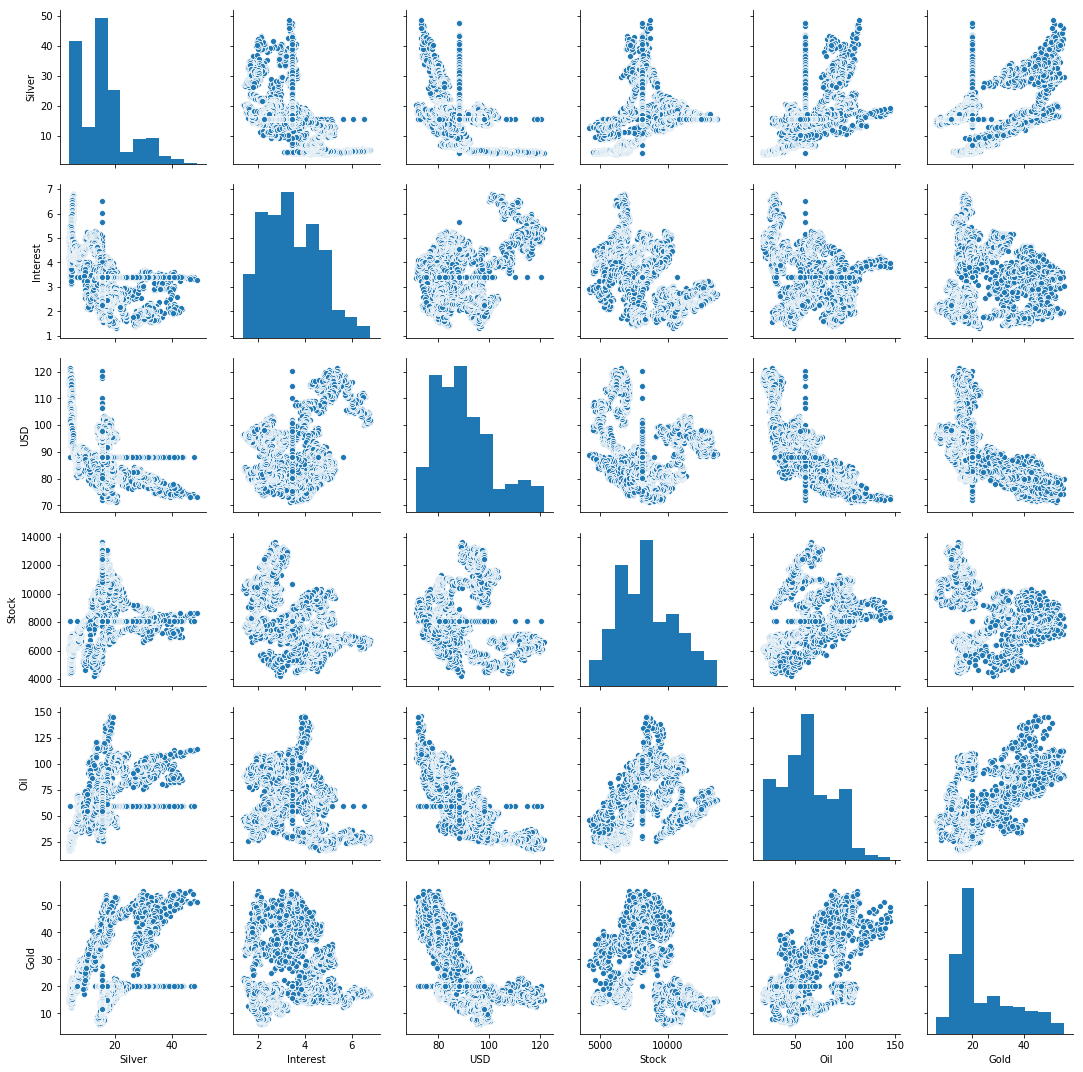

In [31]:
import seaborn as sb
sb.pairplot(DF)  # plot on original data

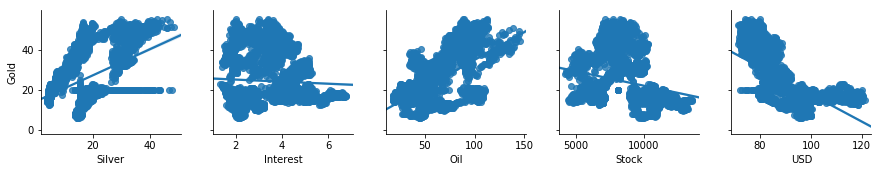

In [32]:
sns.pairplot(DF, x_vars = ['Silver','Interest','Oil','Stock','USD'],
            y_vars ='Gold',kind= 'reg')  # plotting on orginal data

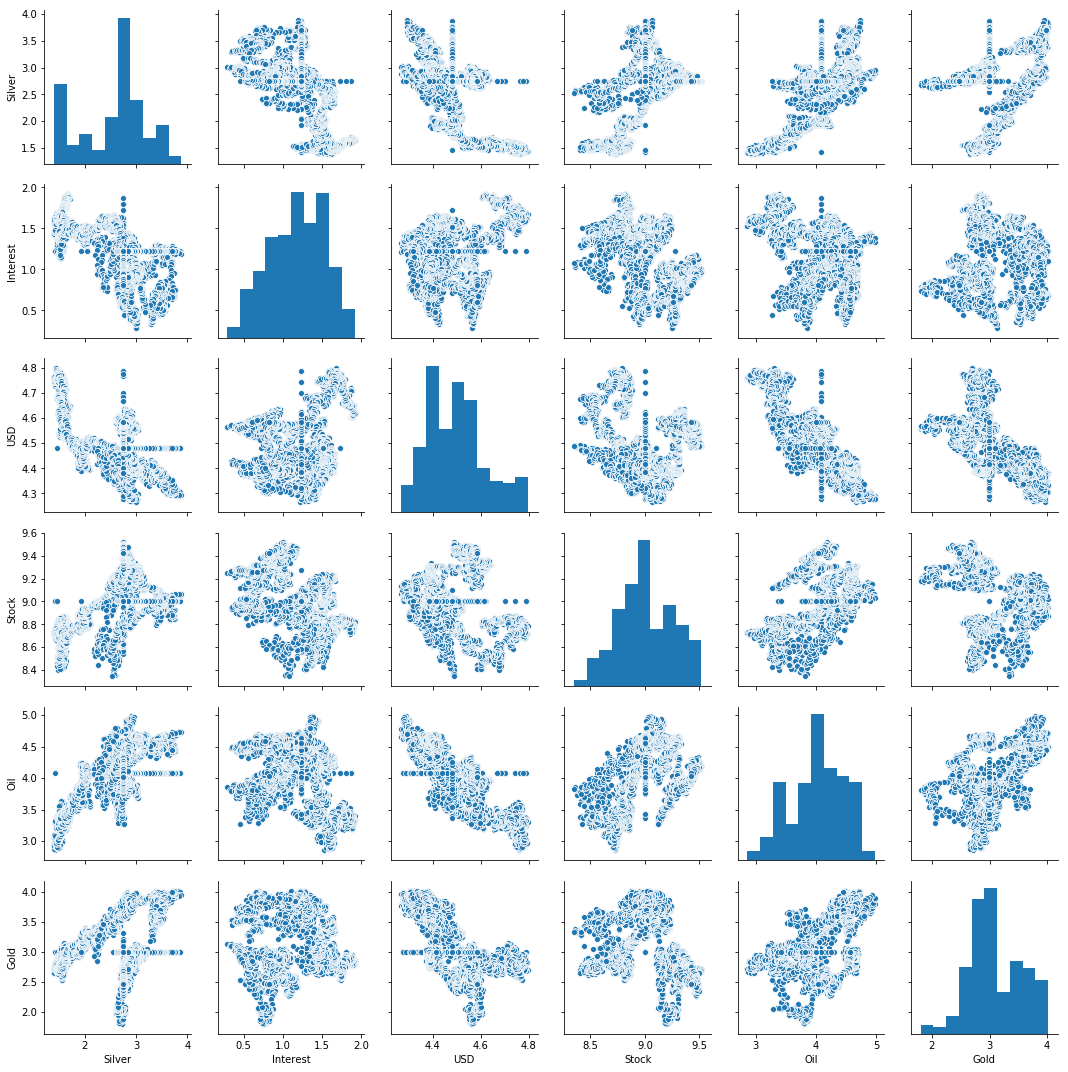

In [33]:
sb.pairplot(DF.apply(np.log)) # plotting on logarithm transformed

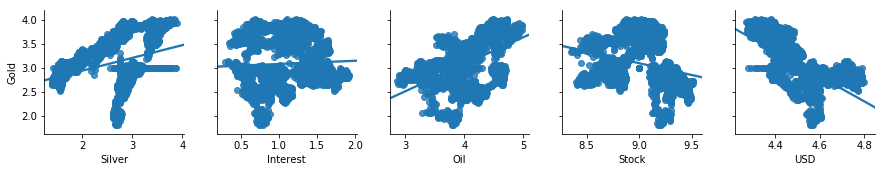

In [34]:
sns.pairplot(DF.apply(np.log), x_vars = ['Silver','Interest','Oil','Stock','USD'],
            y_vars ='Gold',kind= 'reg')  # plotting on log data

In [35]:
from scipy.stats.stats import pearsonr

In [36]:
corr= DF.apply(np.log).corr(method='pearson')  # pearson correlation matrix
corr

,Silver,Interest,USD,Stock,Oil,Gold
Silver,1.000000,-0.693308,-0.685982,0.553343,0.805484,0.367488
Interest,-0.693308,1.000000,0.290498,-0.503399,-0.411224,0.051651
USD,-0.685982,0.290498,1.000000,-0.186978,-0.860155,-0.684802
Stock,0.553343,-0.503399,-0.186978,1.000000,0.457491,-0.268284
Oil,0.805484,-0.411224,-0.860155,0.457491,1.000000,0.543386
Gold,0.367488,0.051651,-0.684802,-0.268284,0.543386,1.000000


In [37]:
data = DF.apply(np.log)

In [38]:
data.head()

,Silver,Interest,USD,Stock,Oil,Gold
Date,,,,,,
2000-01-03,2.747912,1.871494,4.604070,8.819090,4.083621,2.865766
2000-01-04,1.674289,1.876407,4.606170,8.786267,3.240637,2.851429
2000-01-05,1.642873,1.875028,4.605670,8.789817,3.215269,2.865766
2000-01-06,1.634521,1.880686,4.608564,8.800180,3.210037,2.876386
2000-01-07,1.638997,1.878701,4.610158,8.823599,3.187179,2.879900


In [39]:
# min-max normalization 
data_N=(data-data.min())/(data.max()-data.min())  # data normalization
data_N.describe()

,Silver,Interest,USD,Stock,Oil,Gold
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,0.473108,0.550212,0.430288,0.564299,0.554106,0.582002
std,0.251385,0.215773,0.226396,0.212836,0.207683,0.205280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241633,0.382034,0.247755,0.412456,0.428808,0.444692
50%,0.544118,0.578635,0.401230,0.557392,0.577657,0.537148
75%,0.619697,0.719734,0.567378,0.739734,0.719692,0.742624
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data_N.head()

,Silver,Interest,USD,Stock,Oil,Gold
Date,,,,,,
2000-01-03,0.544118,0.973757,0.635384,0.402329,0.577657,0.479527
2000-01-04,0.113035,0.976781,0.639342,0.374233,0.179909,0.473046
2000-01-05,0.100421,0.975932,0.638401,0.377271,0.167940,0.479527
2000-01-06,0.097067,0.979415,0.643856,0.386142,0.165471,0.484328
2000-01-07,0.098864,0.978194,0.646859,0.406189,0.154685,0.485917


In [41]:
# Checking the correlation again on normalized data

corr= data_N.corr(method='pearson')
corr

,Silver,Interest,USD,Stock,Oil,Gold
Silver,1.000000,-0.693308,-0.685982,0.553343,0.805484,0.367488
Interest,-0.693308,1.000000,0.290498,-0.503399,-0.411224,0.051651
USD,-0.685982,0.290498,1.000000,-0.186978,-0.860155,-0.684802
Stock,0.553343,-0.503399,-0.186978,1.000000,0.457491,-0.268284
Oil,0.805484,-0.411224,-0.860155,0.457491,1.000000,0.543386
Gold,0.367488,0.051651,-0.684802,-0.268284,0.543386,1.000000


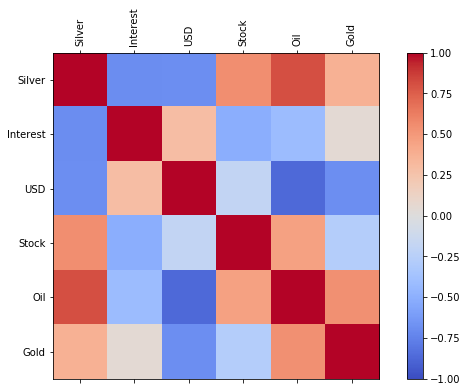

In [42]:
corr = data_N.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_N.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_N.columns)
ax.set_yticklabels(data_N.columns)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X = np.asarray(data_N[['Silver', 'USD', 'Interest', 'Stock', "Oil"]])
Y = np.asarray(data_N['Gold'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, shuffle= True)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))
print(reg)


Mean squared error: 0.01
R²: 0.70
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [46]:
import statsmodels.formula.api as smf
Model = smf.ols(formula="Gold ~ Silver + USD + Stock + Interest + Oil", data=data_N).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:31:32   Log-Likelihood:                 4128.7
No. Observations:                5417   AIC:                            -8245.
Df Residuals:                    5411   BIC:                            -8206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5783      0.017     34.540      0.000       0.546       0.611
Silver         0.2880      0.014     20.257      0.000       0.260       0.316
USD           -0.3193      0.015    -21.043      0.000      -0.349      -0.290
Stock         -0.5245      0.010    -52.456      0.000      -0.544      -0.505
Interest       0.2394      0.011     22.146      0.000       0.218       0.261
Oil            0.3052      0.020     15.577      0.000       0.267       0.344
==============================================================================
Omnibus:                      173.911   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.498
Skew:                          -0.382   Prob(JB):                     1.90e-36
Kurtosis:                       2.618   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
## fitting the model adding a constant 
import statsmodels.api as sm

data_NC = sm.add_constant(data_N)

model = smf.ols(formula="Gold ~ Silver + USD + Stock + Interest + Oil", data=data_NC).fit()
model.summary()

# adding a constant dont change the values.

C:\Users\Sarit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:35:24   Log-Likelihood:                 4128.7
No. Observations:                5417   AIC:                            -8245.
Df Residuals:                    5411   BIC:                            -8206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5783      0.017     34.540      0.000       0.546       0.611
Silver         0.2880      0.014     20.257      0.000       0.260       0.316
USD           -0.3193      0.015    -21.043      0.000      -0.349      -0.290
Stock         -0.5245      0.010    -52.456      0.000      -0.544      -0.505
Interest       0.2394      0.011     22.146      0.000       0.218       0.261
Oil            0.3052      0.020     15.577      0.000       0.267       0.344
==============================================================================
Omnibus:                      173.911   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.498
Skew:                          -0.382   Prob(JB):                     1.90e-36
Kurtosis:                       2.618   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

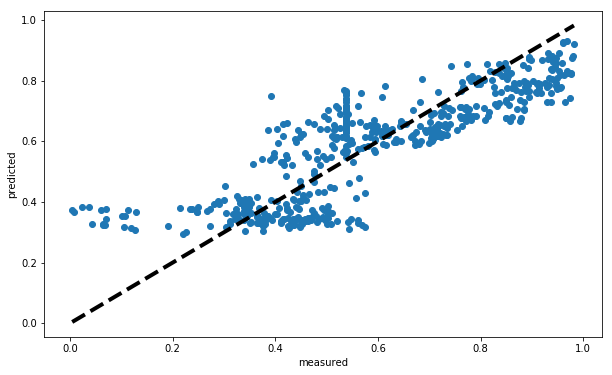

In [50]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()